<a href="https://colab.research.google.com/github/Pranuu18/Data-Analysis-with-python-pandas/blob/main/Sales_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading datasets**

In [ ]:
customer_data = pd.read_csv("customer.csv")
sales_data = pd.read_csv("sales_dataset.csv", low_memory=False)
order_data = pd.read_csv("order.csv")
data_of_March_2021 = pd.read_csv("data_of_March_2021.csv")
data_of_May_2022 = pd.read_csv("data_of_May_2022.csv")



# **Reading the data**

In [ ]:
customer_data.head()
order_data.head()
sales_data.head()
data_of_March_2021.head()
data_of_May_2022.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2345,2345,2345,2345,2345,2345,2345,2345,2345
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2345,2345,2345,2345,2345,2345,2345,2345,2345
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2345,2345,2345,2345,2345,2345,2345,2345,2345
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2345,2345,2345,2345,2345,2345,2345,2345,2345
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2345,2345,2345,2345,2345,2345,2345,2345,2345


# **Data Cleaning**

**1. Data cleaning and handling missing values for customer_data**





In [ ]:
# Checking missing values.
print(customer_data.isnull().sum())

index           0
DATE            1
Months         25
CUSTOMER     1040
Style        1040
SKU          2474
Size         1040
PCS          1040
RATE         1040
GROSS AMT    1040
dtype: int64


In [ ]:
# Filling missing values.
customer_data['DATE'].fillna(customer_data['DATE'].mode()[0], inplace=True)
customer_data['Months'].fillna('Unknown', inplace=True)
customer_data['SKU'].fillna('Unknown', inplace=True)
customer_data.fillna('Missing', inplace=True)

In [ ]:
# Check the Data after handling missing values.
customer_data.head()
print(customer_data.isnull().sum())

index        0
DATE         0
Months       0
CUSTOMER     0
Style        0
SKU          0
Size         0
PCS          0
RATE         0
GROSS AMT    0
dtype: int64


**2. Data cleaning and handling missing values for order_data**

In [ ]:
# Checking missing values for order_data
print(order_data.isnull().sum())


index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64


In [ ]:
# Filling missing values.
order_data['SKU Code'].fillna('N/A', inplace=True)
order_data['Design No.'].fillna('N/A', inplace=True)
order_data['Stock'].fillna(0, inplace=True)
order_data['Category'].fillna('N/A', inplace=True)
order_data['Size'].fillna('N/A', inplace=True)
order_data['Color'].fillna('N/A', inplace=True)

In [ ]:
# Check the Data after handling missing values.
order_data.head()
print(order_data.isnull().sum())

index         0
SKU Code      0
Design No.    0
Stock         0
Category      0
Size          0
Color         0
dtype: int64


**3. Data cleaning and handling missing values for sales_data**



In [ ]:
# Checking missing values.
print(sales_data.isnull().sum())

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6871
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49142
B2B                       0
fulfilled-by          89679
Unnamed: 22           49041
dtype: int64


In [ ]:
# Filling missing values.

# 1. Droping the empty column
sales_data.drop(columns=['Unnamed: 22'], inplace=True)

# 2. Impute missing 'currency' and 'Amount' with 'Unknown' or 0
sales_data['currency'].fillna('Unknown', inplace=True)
sales_data['Amount'].fillna(0, inplace=True)

# 3. Impute missing 'Courier Status' with 'Not Specified'
sales_data['Courier Status'].fillna('Not Specified', inplace=True)

# 4. Impute missing location data with 'Unknown'
for col in ['ship-city', 'ship-state', 'ship-country']:
    sales_data[col].fillna('N/A', inplace=True)

sales_data['ship-postal-code'].fillna(0, inplace=True)
sales_data['promotion-ids'].fillna('N/A', inplace=True)

# 5. If 'fulfilled-by' is not critical, drop rows or handle imputation
# sales_data_df.dropna(subset=['fulfilled-by'], inplace=True)
sales_data['fulfilled-by'].fillna('None', inplace=True)


In [ ]:
# Check the Data after handling missing values.
sales_data.head()
print(sales_data.isnull().sum())

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


**4. Data cleaning and handling missing values for data_of_March_2021**

In [ ]:
# Checking missing values.
print(data_of_March_2021.isnull().sum())

Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP 1              0
TP 2              0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64


**5. Data cleaning and handling missing values for data_of_May_2022**

In [ ]:
# Checking missing values.
print(data_of_May_2022.isnull().sum())

index             0
Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP                0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64


# **Exploring the Data**

**- Displaying the basic statistics**

In [ ]:
print(customer_data.describe())
print(sales_data.describe())
print(order_data.describe())
print(data_of_March_2021.describe())
print(data_of_May_2022.describe())


              index
count  37432.000000
mean   18715.500000
std    10805.831975
min        0.000000
25%     9357.750000
50%    18715.500000
75%    28073.250000
max    37431.000000
                 Qty         Amount  ship-postal-code
count  128949.000000  128949.000000     128949.000000
mean        0.904629     609.350774     463859.558942
std         0.314782     313.353546     191592.613737
min         0.000000       0.000000          0.000000
25%         1.000000     413.000000     382421.000000
50%         1.000000     583.000000     500033.000000
75%         1.000000     771.000000     600024.000000
max        15.000000    5584.000000     989898.000000
             index        Stock
count  9271.000000  9271.000000
mean   4635.000000    26.144537
std    2676.451507    58.372091
min       0.000000     0.000000
25%    2317.500000     3.000000
50%    4635.000000     8.000000
75%    6952.500000    31.000000
max    9270.000000  1234.000000
                 Sku Style Id Catalog Category

**- Checking the first few rows of each dataset**

In [ ]:
print(customer_data.info())
print(sales_data.info())
print(order_data.info())
print(data_of_March_2021.info())
print(data_of_May_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37432 non-null  object
 2   Months     37432 non-null  object
 3   CUSTOMER   37432 non-null  object
 4   Style      37432 non-null  object
 5   SKU        37432 non-null  object
 6   Size       37432 non-null  object
 7   PCS        37432 non-null  object
 8   RATE       37432 non-null  object
 9   GROSS AMT  37432 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fu

# **Financial Performance**

**1. Total Revenue**
- Calculate the total revenue.








In [ ]:
# Total revenue calculation
total_revenue = sales_data['Amount'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $78575172.94


**2. Top-Selling Products**
- Identify top-selling products based on the quantity sold.

In [ ]:
# Top-selling products
top_selling_products = sales_data.groupby('SKU')['Qty'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Qty', ascending=False)
print(top_selling_products.head())


               SKU  Qty
4548  JNE3797-KR-L  661
4549  JNE3797-KR-M  561
4550  JNE3797-KR-S  503
2746  JNE3405-KR-L  485
1346   J0230-SKD-M  469


**3. Average Order Value**
- Calculate the average order value.

In [ ]:
# Average order value
average_order_value = sales_data.groupby('Order ID')['Amount'].sum().mean()
print(f"Average Order Value: ${average_order_value:.2f}")


Average Order Value: $652.88


**4. Peak Sales Periods**
- Determine peak sales periods.



<ipython-input-51-f5fe336c414d>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')


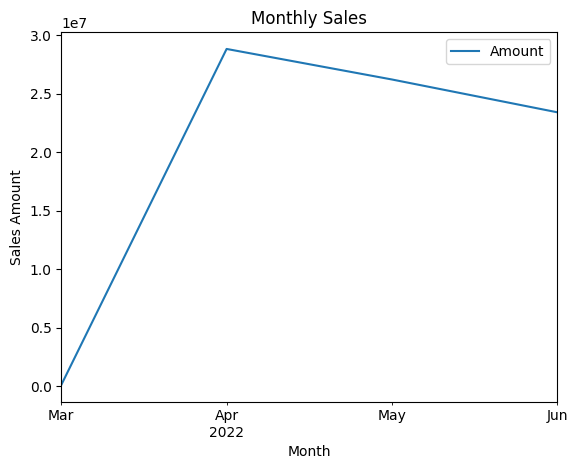

In [ ]:
# Sales by month

# Ensure the 'Date' column is in datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Extract month and year
sales_data['month'] = sales_data['Date'].dt.to_period('M')

# Group by month and sum the Amount
monthly_sales = sales_data.groupby('month')['Amount'].sum().reset_index()

# Plotting
monthly_sales.plot(x='month', y='Amount', kind='line', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

In [ ]:
print(sales_data.columns)


Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


# **Customer Insights**


**1. Top-Performing Locations**

In [ ]:
top_locations = sales_data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)
print(top_locations.head())


ship-city
BENGALURU    6846485.99
HYDERABAD    4944742.82
MUMBAI       3703033.80
NEW DELHI    3613092.78
CHENNAI      3097021.74
Name: Amount, dtype: float64


**2. Order Cancellations**

In [ ]:
cancellations = sales_data[sales_data['Status'] == 'Cancelled']
cancellation_rate = len(cancellations) / len(sales_data) * 100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')


Cancellation Rate: 14.22%


**3. B2B Customers**

In [ ]:
b2b_customers = sales_data['B2B'].value_counts()
print(b2b_customers)


B2B
False    128078
True        871
Name: count, dtype: int64


# **Logistics and Fulfillment**





**- Orders Fulfilled by None vs Easy Ship**


















In [ ]:
fulfillment_distribution = sales_data['fulfilled-by'].value_counts()
print(fulfillment_distribution)


fulfilled-by
None         89679
Easy Ship    39270
Name: count, dtype: int64


# **Product Management**

**1. Popular Product Categories**

In [ ]:
popular_categories = sales_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(popular_categories.head())


Category
Set              39196086.67
kurta            21295132.70
Western Dress    11212423.69
Top               5347242.30
Ethnic Dress       790362.66
Name: Amount, dtype: float64


**2. Average Quantity Ordered**

In [ ]:
average_quantity = sales_data['Qty'].mean()
print(f'Average Quantity Ordered: {average_quantity}')


Average Quantity Ordered: 0.9046289618376258


# **Customer Satisfaction and Returns**

**1. Return and Cancellation Rates**

In [ ]:
return_and_cancellation_rate = len(cancellations) / len(sales_data) * 100
print(f'Return and Cancellation Rate: {return_and_cancellation_rate:.2f}%')


Return and Cancellation Rate: 14.22%


**2. Problematic Products/Categories**

In [ ]:
problematic_products = cancellations.groupby('SKU')['Amount'].sum().sort_values(ascending=False)
print(problematic_products.head())


SKU
JNE3797-KR-L      55269.77
JNE3797-KR-M      50440.16
JNE3797-KR-S      47108.57
J0230-SKD-M       44088.20
SET183-KR-DH-M    32362.98
Name: Amount, dtype: float64


# **Summary**

***Summarize the findings based on the insights gathered:***

- **Financial Performance**: [Summary of total revenue, top-selling products, etc.]

- **Customer Insights**: [Top locations, cancellation analysis, etc.]

- **Logistics**: [Shipping times, fulfillment methods, etc.]

- **Product Management**: [Popular categories, etc.]

- **Customer Satisfaction**: [Return rates, problematic products, etc.]


**The project has effectively tackled critical business challenges, delivering valuable insights which helps in decision-making, improving operational efficiency, and drive sustainable growth in a competitive retail market.**


# **Visualization of the Sales Data Insights Summary**

<ipython-input-74-ba80edea1332>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Amount', y='SKU', data=top_products, ax=axs[0, 1], palette='viridis', ci=None)
<ipython-input-74-ba80edea1332>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='SKU', data=top_products, ax=axs[0, 1], palette='viridis', ci=None)


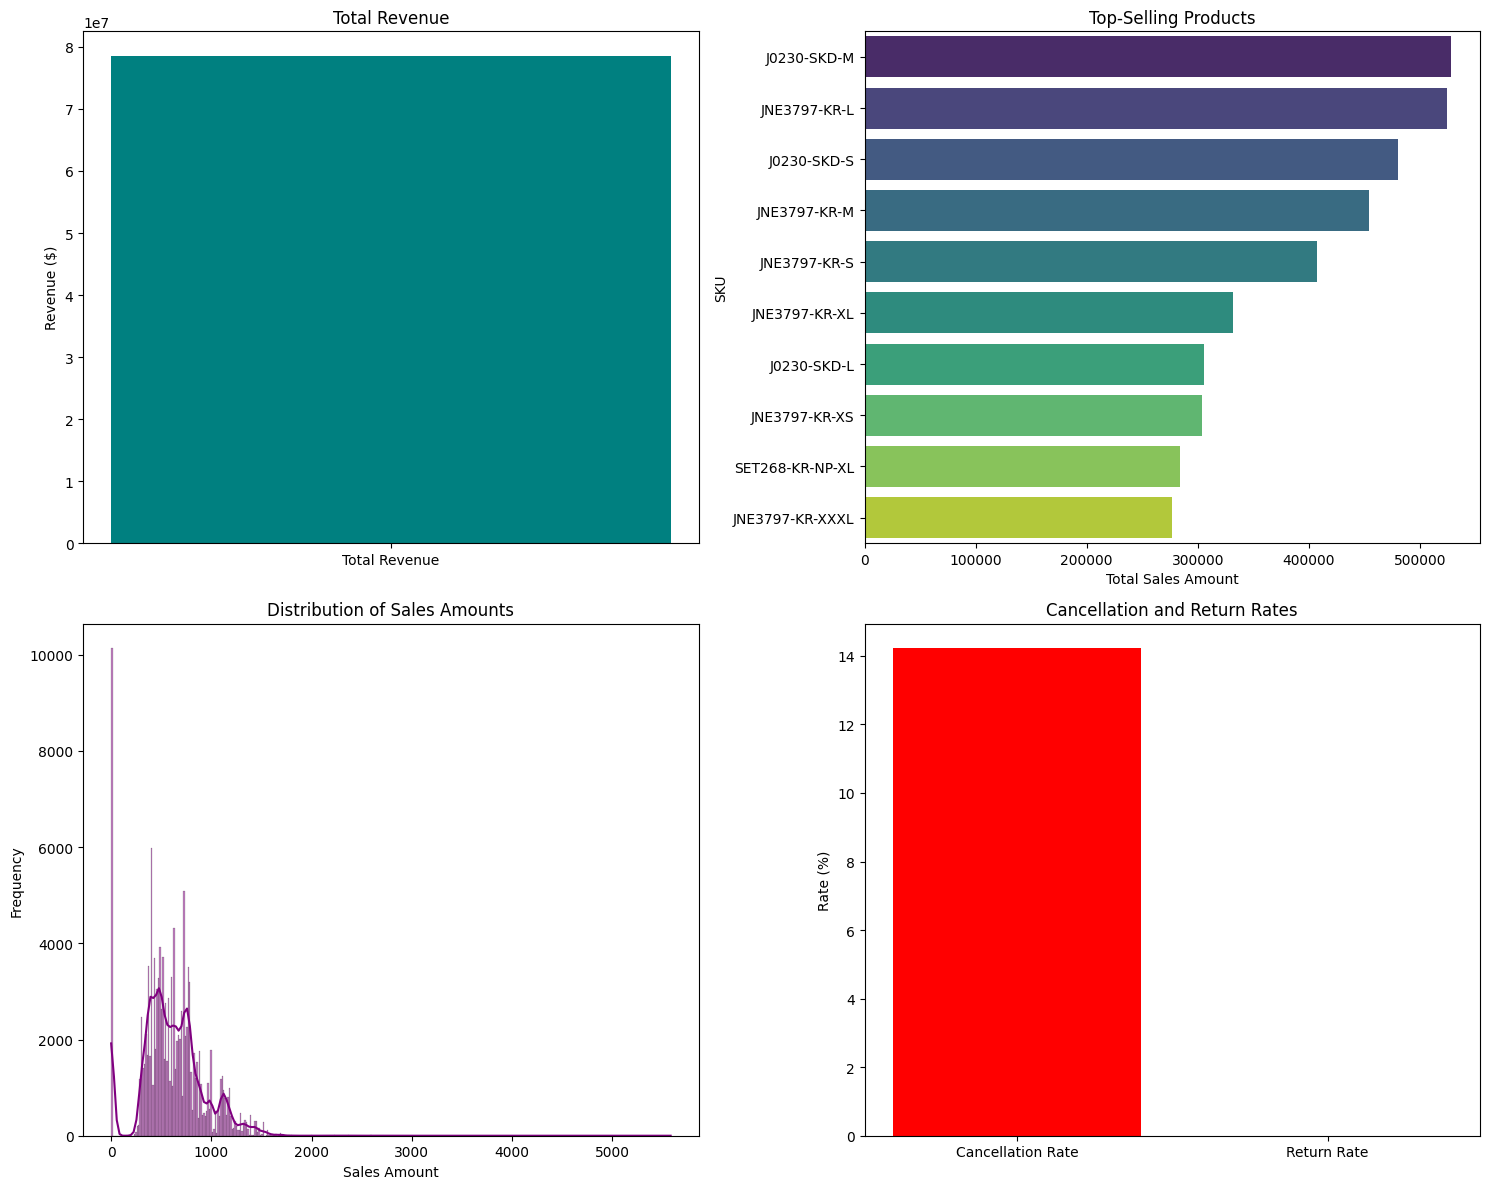

In [ ]:
#Revenue, Top Products, Distribution, and cancellation and return Rates

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Total Revenue
total_revenue = sales_data['Amount'].sum()
axs[0, 0].bar(['Total Revenue'], [total_revenue], color='teal')
axs[0, 0].set_title('Total Revenue')
axs[0, 0].set_ylabel('Revenue ($)')

# Plot 2: Top-Selling Products
top_products = sales_data.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Amount', y='SKU', data=top_products, ax=axs[0, 1], palette='viridis', ci=None)
axs[0, 1].set_title('Top-Selling Products')
axs[0, 1].set_xlabel('Total Sales Amount')

# Plot 3: Sales Amount Distribution
sns.histplot(sales_data['Amount'], kde=True, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Distribution of Sales Amounts')
axs[1, 0].set_xlabel('Sales Amount')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Return and Cancellation Rate
cancellation_rate = (sales_data[sales_data['Status'] == 'Cancelled'].shape[0] / sales_data.shape[0]) * 100
return_rate = (sales_data[sales_data['Status'] == 'Returned'].shape[0] / sales_data.shape[0]) * 100
rates = [cancellation_rate, return_rate]
rate_labels = ['Cancellation Rate', 'Return Rate']
axs[1, 1].bar(rate_labels, rates, color=['red', 'brown'])
axs[1, 1].set_title('Cancellation and Return Rates')
axs[1, 1].set_ylabel('Rate (%)')

# Adjust layout
plt.tight_layout()
plt.show()


**The Insights of the above visualization are:**

*   **Total Revenue:** Shows the total revenue from the datset.
*   **Top-Selling Products**: Displays the top 10 products by total sales amount.
*   **Sales Amount Distribution:** Shows the distribution of sales amounts using a histogram with a KDE plot.
*   **Return and Cancellation Rates:** Compares the rates of order cancellations and returns.







